# IMPORTAR LIBRERIAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# 
___

# DATA SETS - LECTURA

In [2]:
df_academico = pd.read_csv("../01_data/01_raw/StudentPerformanceFactors.csv", sep=",") 
df_academico.head()  

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df_academico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [3]:
# MI FUNCION PARA CATEGORIZAR EN ALTO, MEDIO O BAJO

def categorize_exam_score(score):
    if score >= 67:
        return 1  # HIGH
#    elif score >= 65:
#        return 2  # MEDIUM
    else:
        return 0  # LOW

In [4]:
# MI FUNCION PARA CATEGORIZAR EN ALTO, MEDIO O BAJO

def categorize_quality(Involvement):
    if Involvement == "High":
        return 3  # HIGH
    elif Involvement == "Medium":
        return 2  # MEDIUM
    else:
        return 1  # LOW

In [5]:
# MI FUNCION PARA CATEGORIZAR SI O NO

def categorize_yes_no(answer):
    if answer == "No":
        return 0  # NO
    else:
        return 1  # YES

In [6]:
# MI FUNCION PARA CATEGORIZAR ESCUELA PUBLICA O PRIVADA

def categorize_school(school):
    if school == "Public":
        return 0  # NO
    else:
        return 1  # YES

In [7]:
# MI FUNCION PARA CATEGORIZAR PEER INFLUENCE

def categorize_peer_influence(Involvement):
    if Involvement == "Positive":
        return 3  # POSITIVE
    elif Involvement == "Neutral":
        return 2  # NEUTRAL
    else:
        return 1  # NEGATIVE

In [8]:
# MI FUNCION PARA CATEGORIZAR Parental_Education_Level

def categorize_Parental_Education_Level(level):
    if level == "Postgraduate":
        return 3  
    elif level == "College":
        return 2  
    else:
        return 1  

In [9]:
# MI FUNCION PARA CATEGORIZAR DISTANCIA A CASA

def categorize_home_distance(distance):
    if distance == "Far":
        return 3  
    elif distance == "Moderate":
        return 2  
    else:
        return 1  

In [10]:
# MI FUNCION PARA CATEGORIZAR HOMBRE O MUJER

def categorize_gender(gender):
    if gender == "Male":
        return 0  # male
    else:
        return 1  # female

In [11]:
df_academico['Exam_Score'] = df_academico['Exam_Score'].apply(categorize_exam_score)
df_academico['Previous_Scores'] = df_academico['Previous_Scores'].apply(categorize_exam_score)
df_academico['Parental_Involvement'] = df_academico['Parental_Involvement'].apply(categorize_quality)
df_academico['Access_to_Resources'] = df_academico['Access_to_Resources'].apply(categorize_quality)
df_academico['Extracurricular_Activities'] = df_academico['Extracurricular_Activities'].apply(categorize_yes_no)
df_academico['Motivation_Level'] = df_academico['Motivation_Level'].apply(categorize_quality)
df_academico['Internet_Access'] = df_academico['Internet_Access'].apply(categorize_yes_no)
df_academico['Family_Income'] = df_academico['Family_Income'].apply(categorize_quality)
df_academico['Teacher_Quality'] = df_academico['Teacher_Quality'].apply(categorize_quality)
df_academico['Learning_Disabilities'] = df_academico['Learning_Disabilities'].apply(categorize_yes_no)
df_academico['School_Type'] = df_academico['School_Type'].apply(categorize_school)
df_academico['Peer_Influence'] = df_academico['Peer_Influence'].apply(categorize_peer_influence)
df_academico['Parental_Education_Level'] = df_academico['Parental_Education_Level'].apply(categorize_Parental_Education_Level)
df_academico['Distance_from_Home'] = df_academico['Distance_from_Home'].apply(categorize_home_distance)
df_academico['Gender'] = df_academico['Gender'].apply(categorize_gender)

In [34]:
df_academico.head(1)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,1,1,7,0,1,1,0,1,1,1,1,3,1,1,1,1,0


In [39]:
df_academico.info()   # MIRA BIEN LAS LEARNING DISABILITIES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   int64
 3   Access_to_Resources         6607 non-null   int64
 4   Extracurricular_Activities  6607 non-null   int64
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   int64
 8   Internet_Access             6607 non-null   int64
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   int64
 11  Teacher_Quality             6607 non-null   int64
 12  School_Type                 6607 non-null   int64
 13  Peer_Influence              6607 non-null   int64
 14  Physical

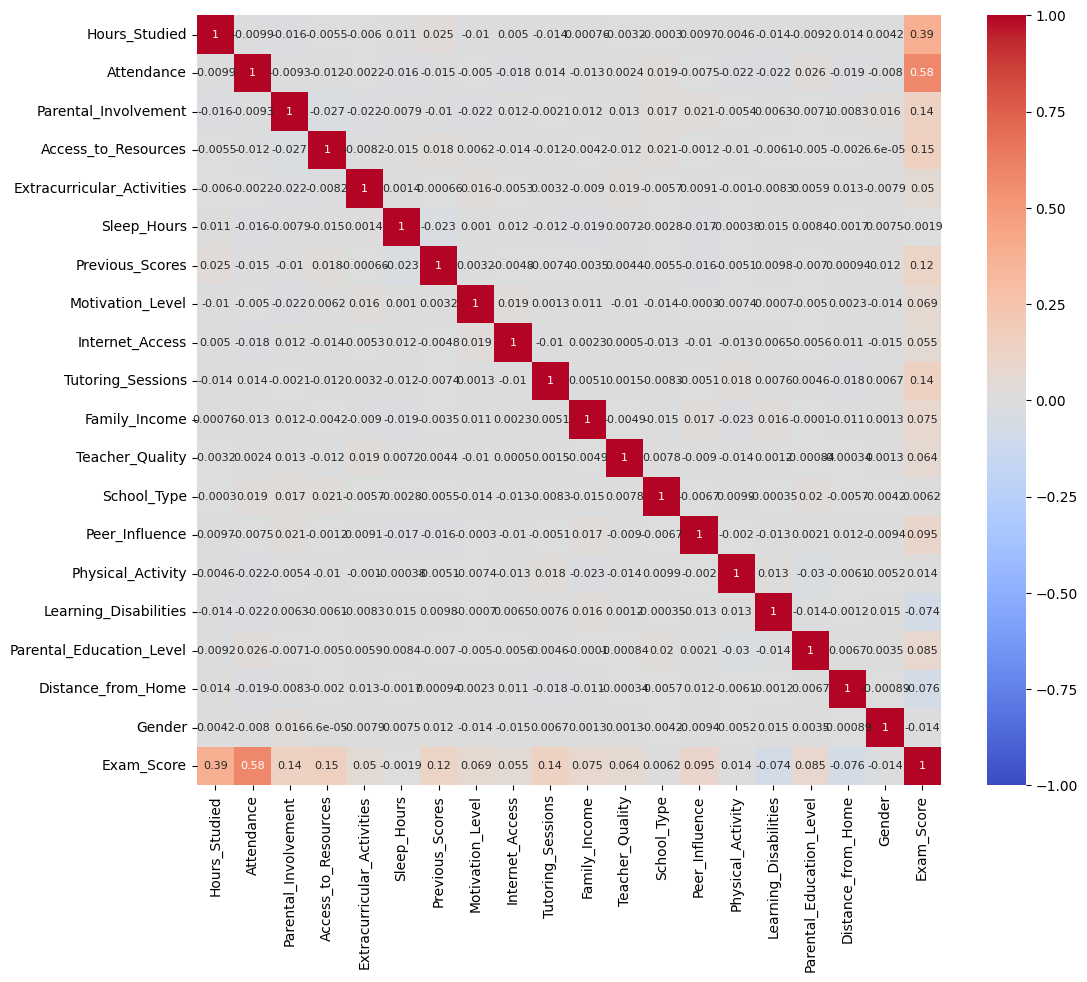

In [40]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_academico.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm", annot_kws={"size": 8})
plt.show()

In [14]:
df_academico.to_csv('ds_academico_limpio_2.csv', index=False)

#
___

# pruebas modelo

Evaluación del modelo de regresión:
Mean Squared Error (MSE): 0.18
Mean Absolute Error (MAE): 0.20
R-squared (R2): 0.28


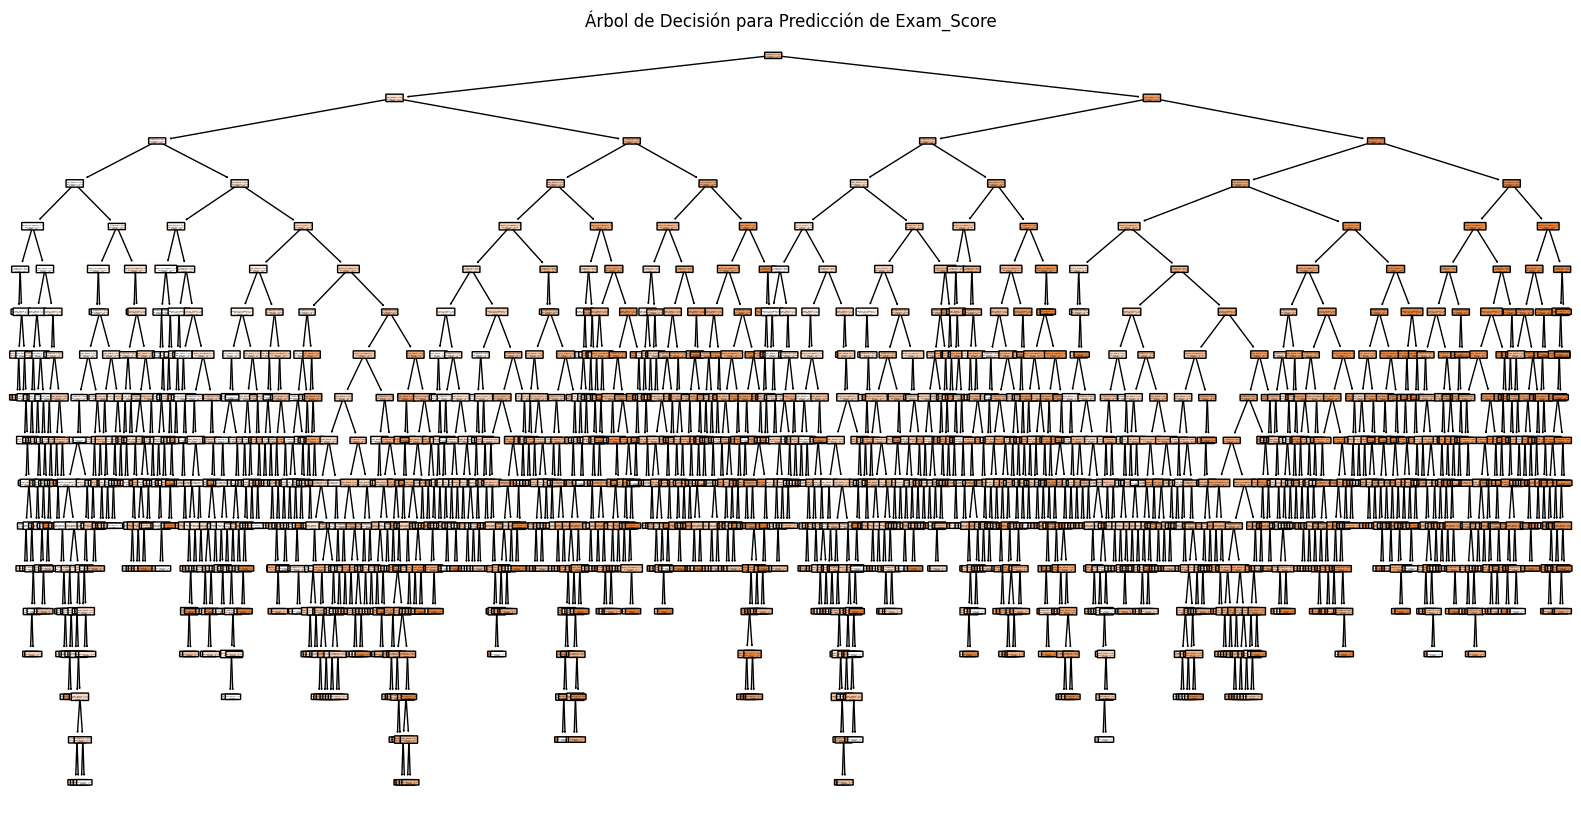

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# PRUEBO DE REGRESION PORQUE ME DIERON MEJORES RESULTADOS Y QUERIA COMPROBAR...

X = df_academico[['Attendance', 'Hours_Studied', 'Previous_Scores', 'Parental_Involvement']]  
y = df_academico['Exam_Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# DECISSION TREE

model = DecisionTreeRegressor(random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluación del modelo de regresión:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")


plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Árbol de Decisión para Predicción de Exam_Score");

Evaluación del Árbol de Decisión:
Mean Squared Error (MSE): 0.12
Mean Absolute Error (MAE): 0.24
R-squared (R2): 0.51


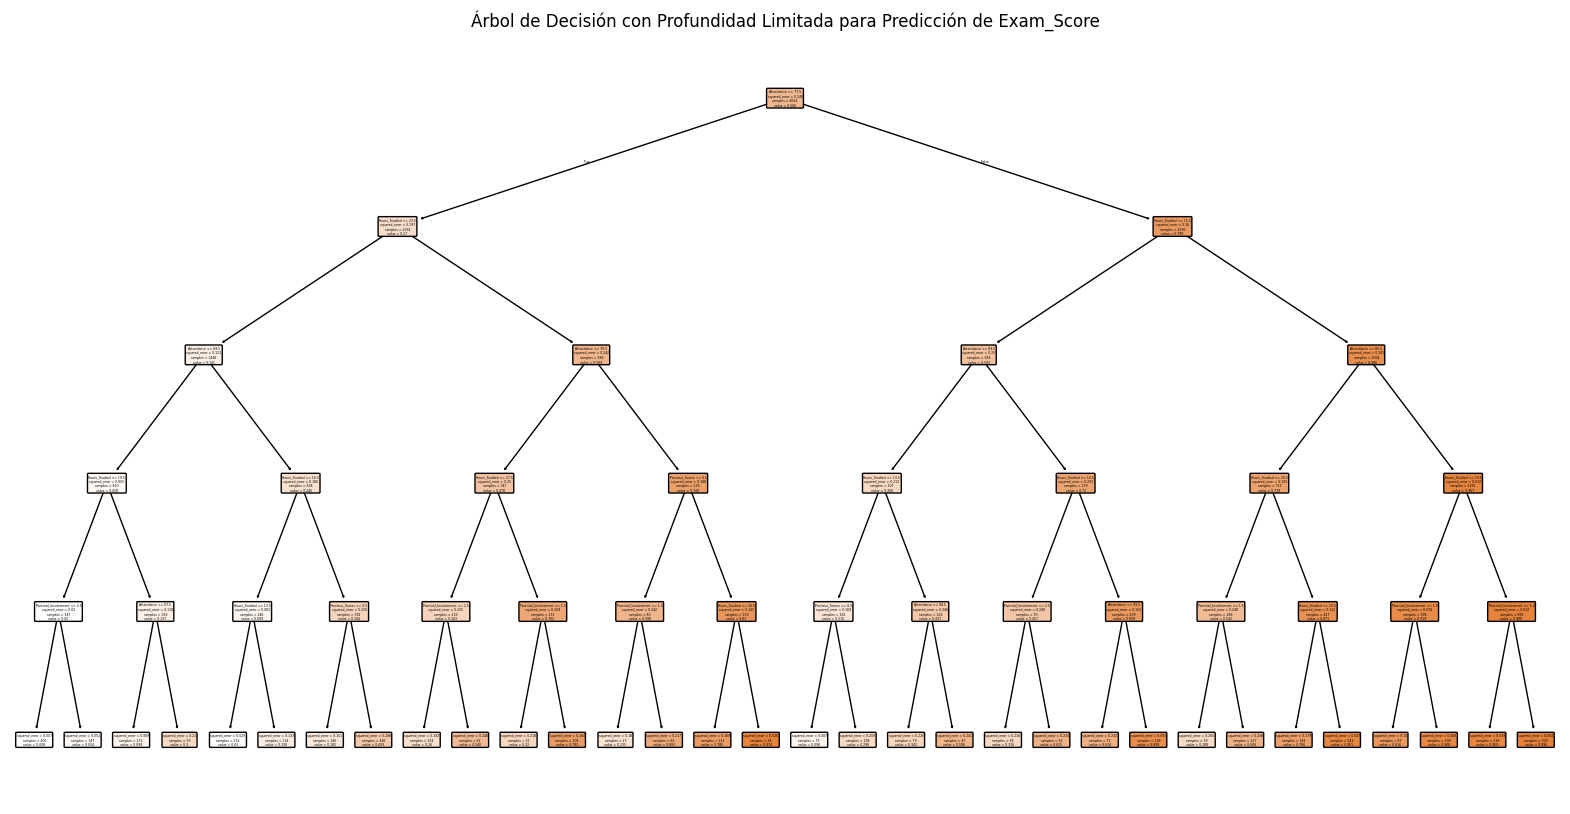


Evaluación del Random Forest:
Mean Squared Error (MSE): 0.11
Mean Absolute Error (MAE): 0.23
R-squared (R2): 0.56

Validación Cruzada del Random Forest (R2 scores):
[0.52906558 0.55801408 0.57921187 0.59178622 0.55640407]
R2 Promedio de Validación Cruzada: 0.56


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



X = df_academico[['Attendance', 'Hours_Studied', 'Previous_Scores', 'Parental_Involvement']]  
y = df_academico['Exam_Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# DECISSION TREE REGRESSOR

tree_model = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)


tree_model.fit(X_train, y_train)


y_pred_tree = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

print("Evaluación del Árbol de Decisión:")
print(f"Mean Squared Error (MSE): {tree_mse:.2f}")
print(f"Mean Absolute Error (MAE): {tree_mae:.2f}")
print(f"R-squared (R2): {tree_r2:.2f}")


plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Árbol de Decisión con Profundidad Limitada para Predicción de Exam_Score")
plt.show()


# ----------------------------------------------------------------------------------------------------------------------

rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("\nEvaluación del Random Forest:")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"R-squared (R2): {rf_r2:.2f}")


cross_val_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print("\nValidación Cruzada del Random Forest (R2 scores):")
print(cross_val_scores)
print(f"R2 Promedio de Validación Cruzada: {cross_val_scores.mean():.2f}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor



X = df_academico[['Attendance', 'Hours_Studied', 'Previous_Scores', 'Parental_Involvement']] 
y = df_academico['Exam_Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# GRADIENT BOOSTING

gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=3)


gb_model.fit(X_train, y_train)


y_pred_gb = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("Evaluación del Gradient Boosting:")
print(f"Mean Squared Error (MSE): {gb_mse:.2f}")
print(f"Mean Absolute Error (MAE): {gb_mae:.2f}")
print(f"R-squared (R2): {gb_r2:.2f}")


cross_val_scores_gb = cross_val_score(gb_model, X, y, cv=5, scoring='r2')
print("\nValidación Cruzada del Gradient Boosting (R2 scores):")
print(cross_val_scores_gb)
print(f"R2 Promedio de Validación Cruzada: {cross_val_scores_gb.mean():.2f}")

# --------------------------------------------------------------------------------------------------------------------------------------

#XG BOOST

xgb_model = XGBRegressor(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1)


xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print("\nEvaluación del XGBoost:")
print(f"Mean Squared Error (MSE): {xgb_mse:.2f}")
print(f"Mean Absolute Error (MAE): {xgb_mae:.2f}")
print(f"R-squared (R2): {xgb_r2:.2f}")


cross_val_scores_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print("\nValidación Cruzada del XGBoost (R2 scores):")
print(cross_val_scores_xgb)
print(f"R2 Promedio de Validación Cruzada: {cross_val_scores_xgb.mean():.2f}")


Evaluación del Gradient Boosting:
Mean Squared Error (MSE): 0.10
Mean Absolute Error (MAE): 0.22
R-squared (R2): 0.59

Validación Cruzada del Gradient Boosting (R2 scores):
[0.5436764  0.57529495 0.60287285 0.61087326 0.58241963]
R2 Promedio de Validación Cruzada: 0.58

Evaluación del XGBoost:
Mean Squared Error (MSE): 0.10
Mean Absolute Error (MAE): 0.22
R-squared (R2): 0.59

Validación Cruzada del XGBoost (R2 scores):
[0.54664814 0.57569957 0.60088736 0.61145091 0.58174586]
R2 Promedio de Validación Cruzada: 0.58


#
___

# CORRELACION ANALISIS

## 📊 Observaciones Clave en el Rendimiento Académico de Estudiantes

---

### 1. 📚 Relación entre **Horas de Estudio (Hours_Studied)** y **Calificación en Examen (Exam_Score)**
- **Correlación**: 0.39
- **Interpretación**: Los estudiantes que dedican más horas al estudio tienden a obtener mejores calificaciones en los exámenes. Este factor tiene una influencia positiva moderada en el rendimiento académico. 📈

---

### 2. 🏫 **Asistencia (Attendance)** y **Calificación en Examen (Exam_Score)**
- **Correlación**: 0.58
- **Interpretación**: La asistencia tiene una correlación positiva fuerte con las calificaciones en los exámenes. Esto sugiere que los estudiantes que asisten regularmente a clase tienden a tener un mejor rendimiento académico. ✅

---

### 3. 👨‍👩‍👧 **Participación de los Padres (Parental_Involvement)** y **Calificación en Examen (Exam_Score)**
- **Correlación**: 0.41
- **Interpretación**: El involucramiento de los padres tiene una relación positiva moderada con las calificaciones. Esto sugiere que los estudiantes cuyos padres están más involucrados en su educación tienden a rendir mejor en los exámenes. 🏠

---

### 4. 🌐 **Acceso a Recursos (Access_to_Resources)** y **Calificación en Examen (Exam_Score)**
- **Correlación**: 0.14
- **Interpretación**: Aunque la correlación es baja, el acceso a recursos (como material educativo o apoyo escolar) tiene una relación positiva con las calificaciones, lo cual puede ser beneficioso para el aprendizaje. 📖

---

### 5. 🌙 **Horas de Sueño (Sleep_Hours)** y **Calificación en Examen (Exam_Score)**
- **Correlación**: 0.11
- **Interpretación**: La correlación es baja, pero sugiere que tener una cantidad adecuada de horas de sueño puede tener un impacto positivo leve en el rendimiento académico. 😴

---

### 6. 📝 **Puntajes Previos (Previous_Scores)** y **Calificación en Examen (Exam_Score)**
- **Correlación**: 0.12
- **Interpretación**: Los puntajes previos de los estudiantes tienen una leve relación positiva con los puntajes actuales, lo cual puede indicar consistencia en el rendimiento académico. 📈

---

### 7. 💻 **Acceso a Internet (Internet_Access)** y **Calificación en Examen (Exam_Score)**
- **Correlación**: 0.05
- **Interpretación**: Aunque esta correlación es baja, el acceso a internet podría ser un recurso adicional para los estudiantes, aunque no es un factor determinante en el rendimiento académico. 🌐

---

### 8. 👩‍🏫 **Calidad del Profesor (Teacher_Quality)** y **Calificación en Examen (Exam_Score)**
- **Correlación**: 0.06
- **Interpretación**: La calidad del profesor tiene una correlación muy leve con el rendimiento en los exámenes, lo cual sugiere que este factor podría no ser decisivo en este contexto específico. 👨‍🏫

---

### 9. 🏋️ **Actividad Física (Physical_Activity)** y **Calificación en Examen (Exam_Score)**
- **Correlación**: -0.06
- **Interpretación**: La actividad física muestra una correlación negativa muy débil con el rendimiento académico, indicando que puede no tener una influencia significativa en las calificaciones. ⚽️

---

### 10. 👨‍👩‍🎓 **Nivel de Educación de los Padres (Parental_Education_Level)** y **Calificación en Examen (Exam_Score)**
- **Correlación**: 0.09
- **Interpretación**: El nivel educativo de los padres tiene una correlación leve con las calificaciones en los exámenes, lo cual sugiere que el contexto educativo en el hogar puede influir, aunque no es determinante. 🎓

---

## 📌 Resumen General
- **Factores que muestran correlaciones positivas con las calificaciones en exámenes**:
  - 📚 **Horas de Estudio**
  - 🏫 **Asistencia**
  - 👨‍👩‍👧 **Participación de los Padres**
  - 🏠 **Acceso a Recursos**
  - 🎓 **Nivel de Educación de los Padres**

- **Factores con correlación negativa débil o muy baja**:
  - 🏋️ **Actividad Física**
  - 🌐 **Acceso a Internet**
  - 😴 **Horas de Sueño**

## 📝 Conclusión
En términos generales, los factores más influyentes en el rendimiento académico de los estudiantes en este conjunto de datos son:

- **Asistencia**: Los estudiantes con mejor asistencia tienden a obtener mejores resultados. ✅
- **Participación de los Padres**: Los estudiantes cuyos padres están involucrados en su educación tienden a tener un mejor rendimiento académico. 🏠
- **Horas de Estudio**: Dedicar más tiempo al estudio está relacionado con mejores calificaciones en los exámenes. 📚

Factores como **actividad física** y **acceso a internet** no parecen tener una relación significativa con las calificaciones en este contexto. 🛑


# 
___

# GRÁFICAS

In [12]:
df_academico.head(1)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,1,1,1,0,1,2,0,3,3,0,1,1,0,1


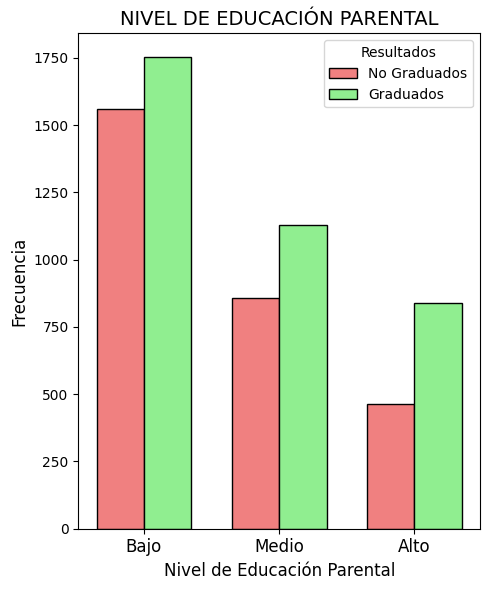

In [ ]:
education_counts = combined_data.groupby(['Exam_Score', 'Parental_Education_Level']).size().unstack(fill_value=0)


fig, ax = plt.subplots(figsize=(5, 6))


bar_width = 0.35
x = np.arange(len(education_counts.columns))


ax.bar(x - bar_width/2, education_counts.loc[0], width=bar_width, label='No Graduados', color='lightcoral', edgecolor='black')
ax.bar(x + bar_width/2, education_counts.loc[1], width=bar_width, label='Graduados', color='lightgreen', edgecolor='black')


ax.set_title('NIVEL DE EDUCACIÓN PARENTAL', fontsize=14)
ax.set_xlabel('Nivel de Educación Parental', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(['Bajo', 'Medio', 'Alto'], fontsize=12)
ax.legend(title='Resultados', fontsize=10)

plt.tight_layout()
plt.show()

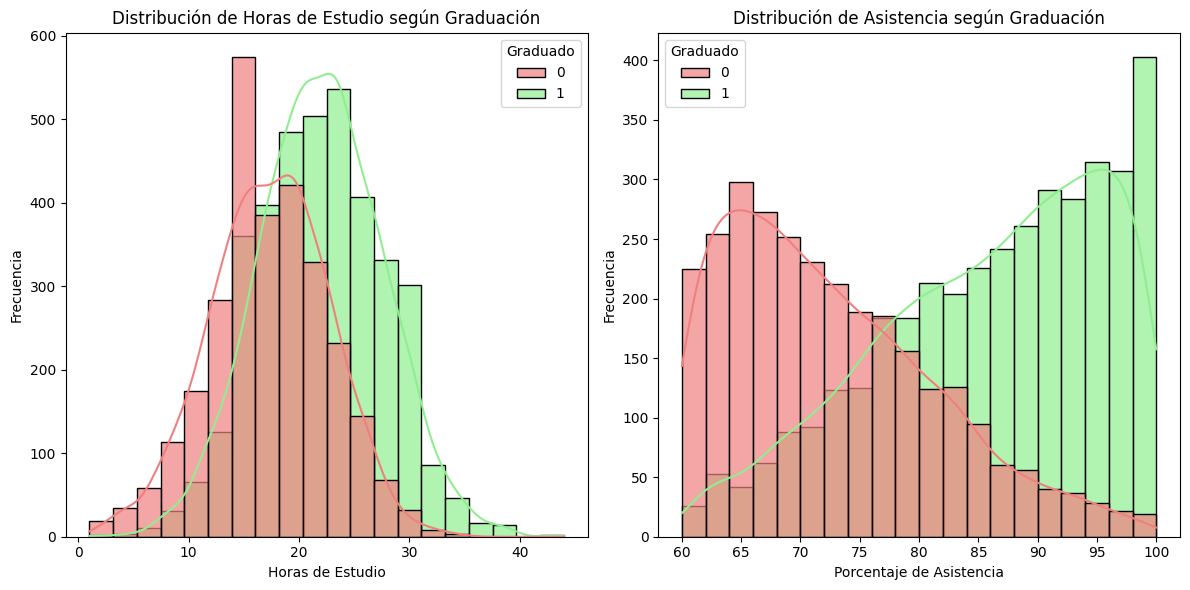

In [ ]:
cleaned_data = df_academico[['Hours_Studied', 'Attendance', 'Exam_Score']].dropna()
cleaned_data.rename(columns={
    'Hours_Studied': 'Horas de Estudio',
    'Attendance': 'Asistencia',
    'Exam_Score': 'Graduado'
}, inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))


sns.histplot(
    data=cleaned_data, x='Horas de Estudio', hue='Graduado',
    palette={0: 'lightcoral', 1: 'lightgreen'}, kde=True, ax=ax[0], bins=20, alpha=0.7
)
ax[0].set_title('Distribución de Horas de Estudio según Graduación', fontsize=12)
ax[0].set_xlabel('Horas de Estudio', fontsize=10)
ax[0].set_ylabel('Frecuencia', fontsize=10)

sns.histplot(
    data=cleaned_data, x='Asistencia', hue='Graduado',
    palette={0: 'lightcoral', 1: 'lightgreen'}, kde=True, ax=ax[1], bins=20, alpha=0.7
)
ax[1].set_title('Distribución de Asistencia según Graduación', fontsize=12)
ax[1].set_xlabel('Porcentaje de Asistencia', fontsize=10)
ax[1].set_ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

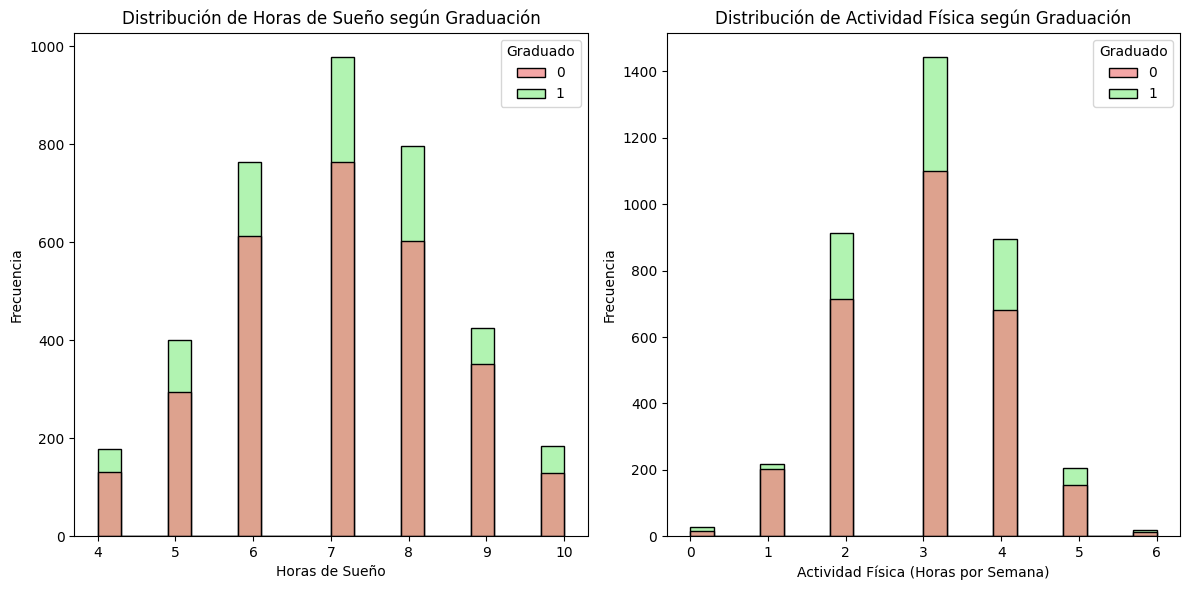

In [ ]:
cleaned_data = df_academico[['Sleep_Hours', 'Physical_Activity', 'Exam_Score']].dropna()
cleaned_data.rename(columns={
    'Sleep_Hours': 'Horas de Sueño',
    'Physical_Activity': 'Actividad Física',
    'Exam_Score': 'Graduado'
}, inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))


sns.histplot(
    data=cleaned_data, x='Horas de Sueño', hue='Graduado',
    palette={0: 'lightcoral', 1: 'lightgreen'}, kde=False, ax=ax[0], bins=20, alpha=0.7
)
ax[0].set_title('Distribución de Horas de Sueño según Graduación', fontsize=12)
ax[0].set_xlabel('Horas de Sueño', fontsize=10)
ax[0].set_ylabel('Frecuencia', fontsize=10)


sns.histplot(
    data=cleaned_data, x='Actividad Física', hue='Graduado',
    palette={0: 'lightcoral', 1: 'lightgreen'}, kde=False, ax=ax[1], bins=20, alpha=0.7
)
ax[1].set_title('Distribución de Actividad Física según Graduación', fontsize=12)
ax[1].set_xlabel('Actividad Física (Horas por Semana)', fontsize=10)
ax[1].set_ylabel('Frecuencia', fontsize=10)

plt.tight_layout()

plt.show()

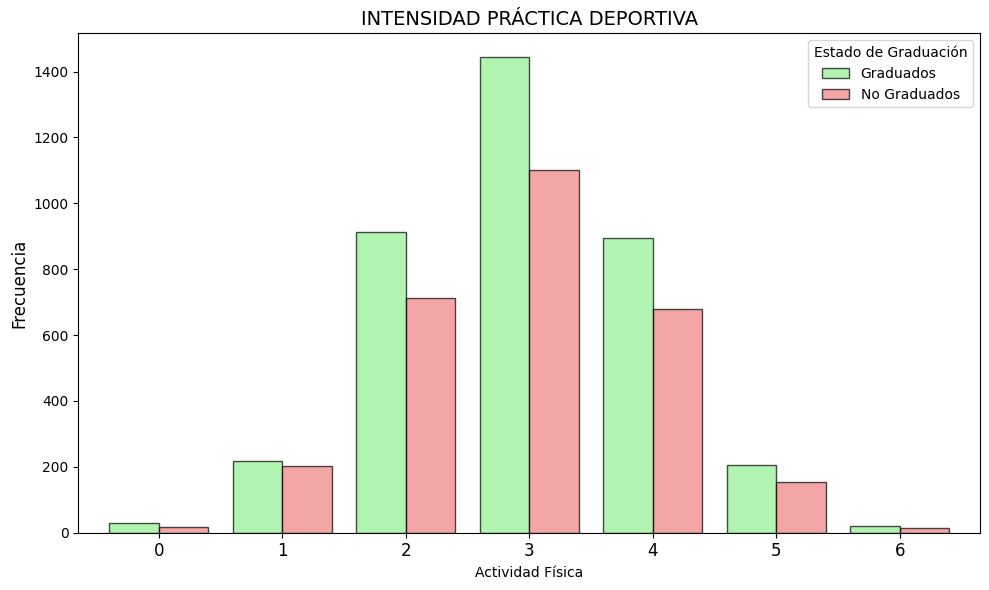

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

intensity_comparison.plot(kind='bar', ax=ax, color=['lightgreen', 'lightcoral'], edgecolor='black', alpha=0.7, width=0.8)


ax.set_xticks(range(len(intensity_comparison.index)))
ax.set_xticklabels(intensity_comparison.index, rotation=0, fontsize=12)


ax.set_title('INTENSIDAD PRÁCTICA DEPORTIVA', fontsize=14)
# ax.set_xlabel('INTENSIDAD PRÁCTICA DEPORTIVA', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)
ax.legend(title='Estado de Graduación', fontsize=10, loc='upper right')


plt.tight_layout()
plt.show()

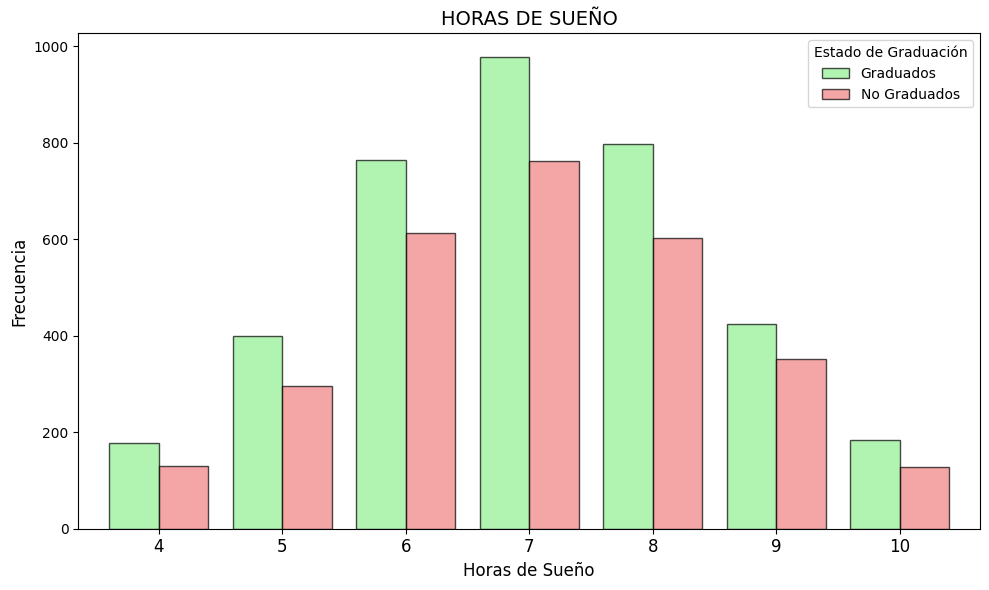

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))


sleep_graduados = cleaned_data[cleaned_data['Graduado'] == 1]['Horas de Sueño'].value_counts().sort_index()
sleep_no_graduados = cleaned_data[cleaned_data['Graduado'] == 0]['Horas de Sueño'].value_counts().sort_index()


sleep_comparison = pd.DataFrame({
    'Graduados': sleep_graduados,
    'No Graduados': sleep_no_graduados
}).fillna(0)

sleep_comparison.plot(kind='bar', ax=ax, color=['lightgreen', 'lightcoral'], edgecolor='black', alpha=0.7, width=0.8)


ax.set_xticks(range(len(sleep_comparison.index)))
ax.set_xticklabels(sleep_comparison.index, rotation=0, fontsize=12)

ax.set_title('HORAS DE SUEÑO', fontsize=14)
ax.set_xlabel('Horas de Sueño', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)
ax.legend(title='Estado de Graduación', fontsize=10, loc='upper right')


plt.tight_layout()
plt.show()

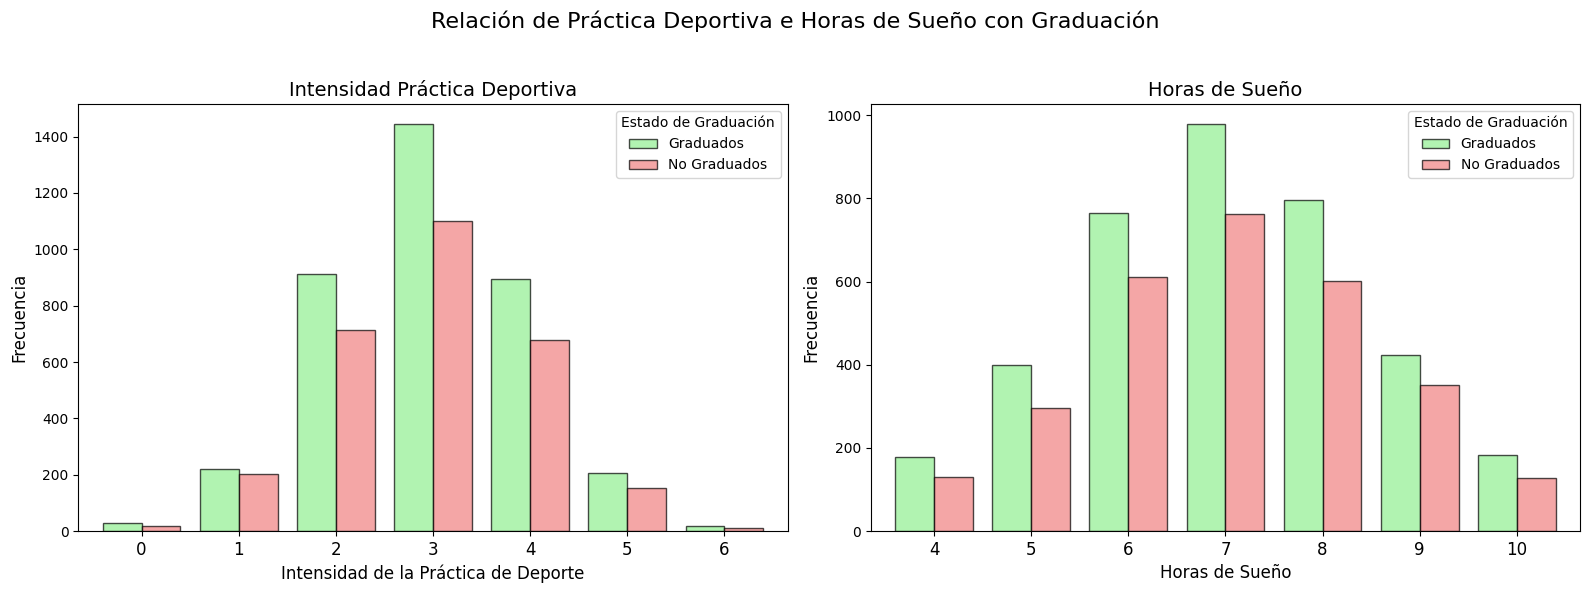

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

intensity_comparison.plot(kind='bar', ax=axes[0], color=['lightgreen', 'lightcoral'], edgecolor='black', alpha=0.7, width=0.8)
axes[0].set_title('Intensidad Práctica Deportiva', fontsize=14)
axes[0].set_xlabel('Intensidad de la Práctica de Deporte', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_xticks(range(len(intensity_comparison.index)))
axes[0].set_xticklabels(intensity_comparison.index, rotation=0, fontsize=12)
axes[0].legend(title='Estado de Graduación', fontsize=10, loc='upper right')

sleep_comparison.plot(kind='bar', ax=axes[1], color=['lightgreen', 'lightcoral'], edgecolor='black', alpha=0.7, width=0.8)
axes[1].set_title('Horas de Sueño', fontsize=14)
axes[1].set_xlabel('Horas de Sueño', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].set_xticks(range(len(sleep_comparison.index)))
axes[1].set_xticklabels(sleep_comparison.index, rotation=0, fontsize=12)
axes[1].legend(title='Estado de Graduación', fontsize=10, loc='upper right')


plt.suptitle('Relación de Práctica Deportiva e Horas de Sueño con Graduación', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Dejar espacio para el título
plt.show()

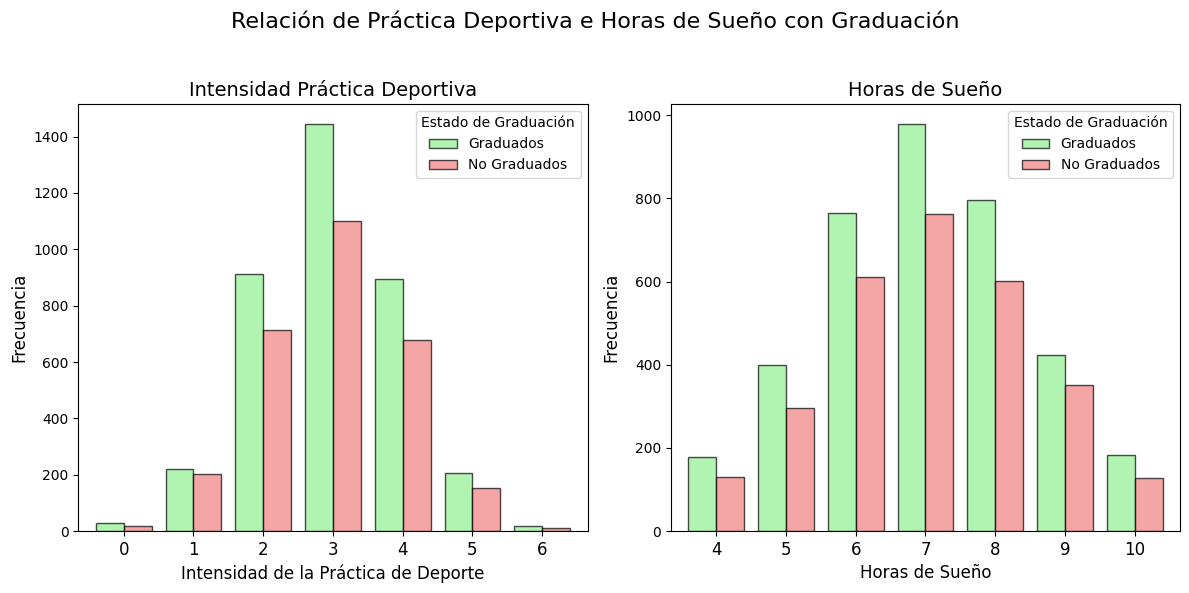

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  

intensity_comparison.plot(kind='bar', ax=axes[0], color=['lightgreen', 'lightcoral'], edgecolor='black', alpha=0.7, width=0.8)
axes[0].set_title('Intensidad Práctica Deportiva', fontsize=14)
axes[0].set_xlabel('Intensidad de la Práctica de Deporte', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_xticks(range(len(intensity_comparison.index)))
axes[0].set_xticklabels(intensity_comparison.index, rotation=0, fontsize=12)
axes[0].legend(title='Estado de Graduación', fontsize=10, loc='upper right')

sleep_comparison.plot(kind='bar', ax=axes[1], color=['lightgreen', 'lightcoral'], edgecolor='black', alpha=0.7, width=0.8)
axes[1].set_title('Horas de Sueño', fontsize=14)
axes[1].set_xlabel('Horas de Sueño', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].set_xticks(range(len(sleep_comparison.index)))
axes[1].set_xticklabels(sleep_comparison.index, rotation=0, fontsize=12)
axes[1].legend(title='Estado de Graduación', fontsize=10, loc='upper right')


plt.suptitle('Relación de Práctica Deportiva e Horas de Sueño con Graduación', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Dejar espacio para el título
plt.show()

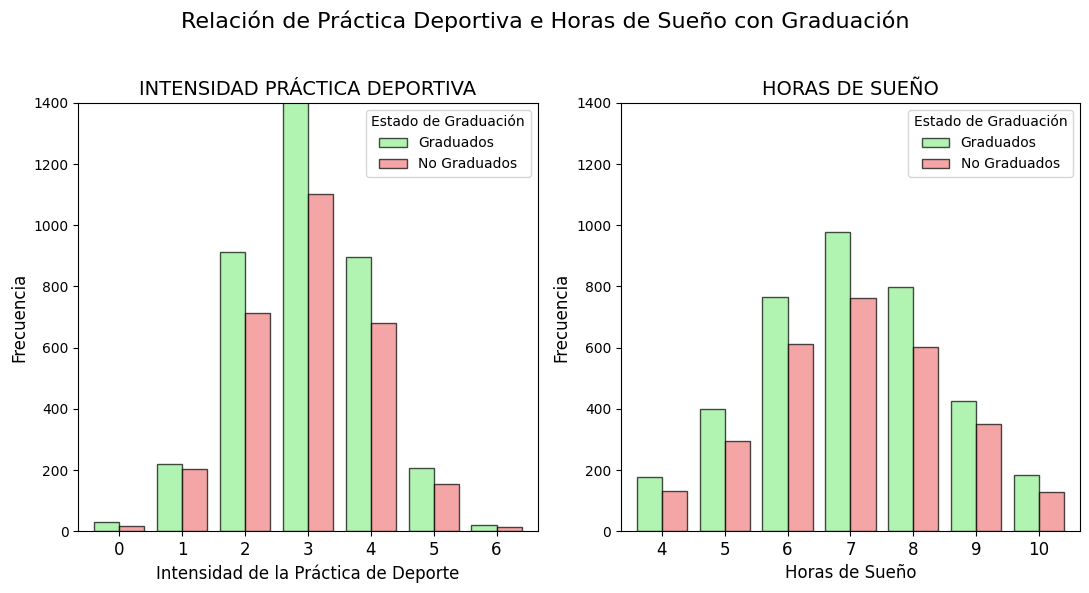

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(11, 6))


intensity_comparison.plot(kind='bar', ax=axes[0], color=['lightgreen', 'lightcoral'], edgecolor='black', alpha=0.7, width=0.8)
axes[0].set_title('INTENSIDAD PRÁCTICA DEPORTIVA', fontsize=14)
axes[0].set_xlabel('Intensidad de la Práctica de Deporte', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_xticks(range(len(intensity_comparison.index)))
axes[0].set_xticklabels(intensity_comparison.index, rotation=0, fontsize=12)
axes[0].set_ylim(0, 1400)  
axes[0].legend(title='Estado de Graduación', fontsize=10, loc='upper right')


sleep_comparison.plot(kind='bar', ax=axes[1], color=['lightgreen', 'lightcoral'], edgecolor='black', alpha=0.7, width=0.8)
axes[1].set_title('HORAS DE SUEÑO', fontsize=14)
axes[1].set_xlabel('Horas de Sueño', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].set_xticks(range(len(sleep_comparison.index)))
axes[1].set_xticklabels(sleep_comparison.index, rotation=0, fontsize=12)
axes[1].set_ylim(0, 1400) 
axes[1].legend(title='Estado de Graduación', fontsize=10, loc='upper right')


plt.suptitle('Relación de Práctica Deportiva e Horas de Sueño con Graduación', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

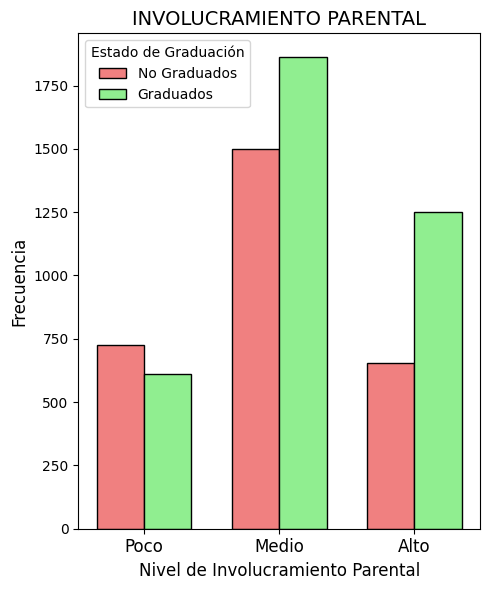

In [ ]:
involvement_counts = combined_data.groupby(['Exam_Score', 'Parental_Involvement']).size().unstack(fill_value=0)


fig, ax = plt.subplots(figsize=(5, 6))


bar_width = 0.35
x = np.arange(len(involvement_counts.columns))


ax.bar(x - bar_width/2, involvement_counts.loc[0], width=bar_width, label='No Graduados', color='lightcoral', edgecolor='black')


ax.bar(x + bar_width/2, involvement_counts.loc[1], width=bar_width, label='Graduados', color='lightgreen', edgecolor='black')


ax.set_title('INVOLUCRAMIENTO PARENTAL', fontsize=14)
ax.set_xlabel('Nivel de Involucramiento Parental', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(['Poco', 'Medio', 'Alto'], fontsize=12)
ax.legend(title='Estado de Graduación', fontsize=10)

plt.tight_layout()
plt.show()

In [46]:
df_academico.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,1,1,1,0,1,2,0,3,3,0,1,1,0,1
1,19,64,1,2,0,8,0,1,1,2,2,2,0,1,4,0,2,2,1,0
2,24,98,2,2,1,7,1,2,1,2,2,2,0,2,4,0,3,1,0,1
3,29,89,1,2,1,8,1,2,1,1,2,2,0,1,4,0,1,2,0,1
4,19,92,2,2,1,6,0,2,1,3,2,3,0,2,4,0,2,1,1,1


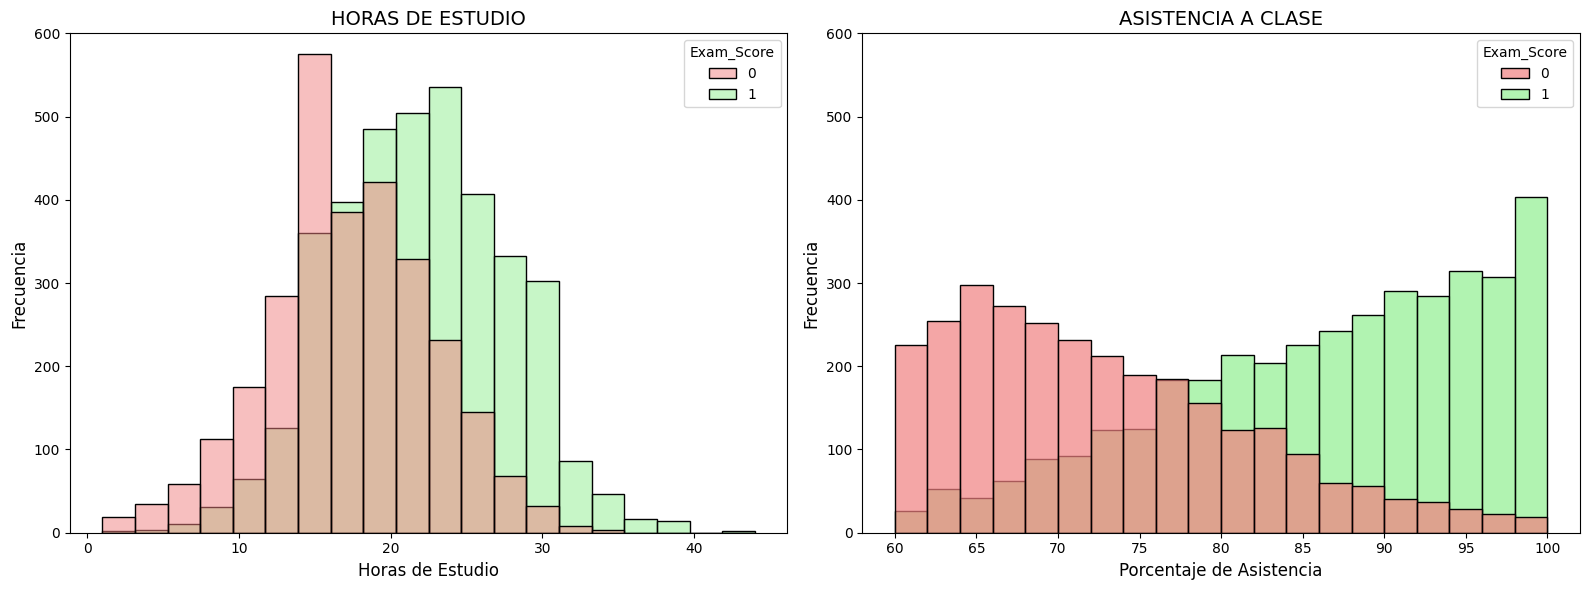

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(
    data=df_academico, x='Hours_Studied', hue='Exam_Score',
    palette={0: 'lightcoral', 1: 'lightgreen'}, kde=False, ax=ax[0], bins=20, alpha=0.5, edgecolor='black'
)
ax[0].set_title('HORAS DE ESTUDIO', fontsize=14)
ax[0].set_xlabel('Horas de Estudio', fontsize=12)
ax[0].set_ylabel('Frecuencia', fontsize=12)
ax[0].set_ylim(0, 600) 


sns.histplot(
    data=df_academico, x='Attendance', hue='Exam_Score',
    palette={0: 'lightcoral', 1: 'lightgreen'}, kde=False, ax=ax[1], bins=20, alpha=0.7, edgecolor='black'
)
ax[1].set_title('ASISTENCIA A CLASE', fontsize=14)
ax[1].set_xlabel('Porcentaje de Asistencia', fontsize=12)
ax[1].set_ylabel('Frecuencia', fontsize=12)
ax[1].set_ylim(0, 600) 


plt.tight_layout()
plt.show()

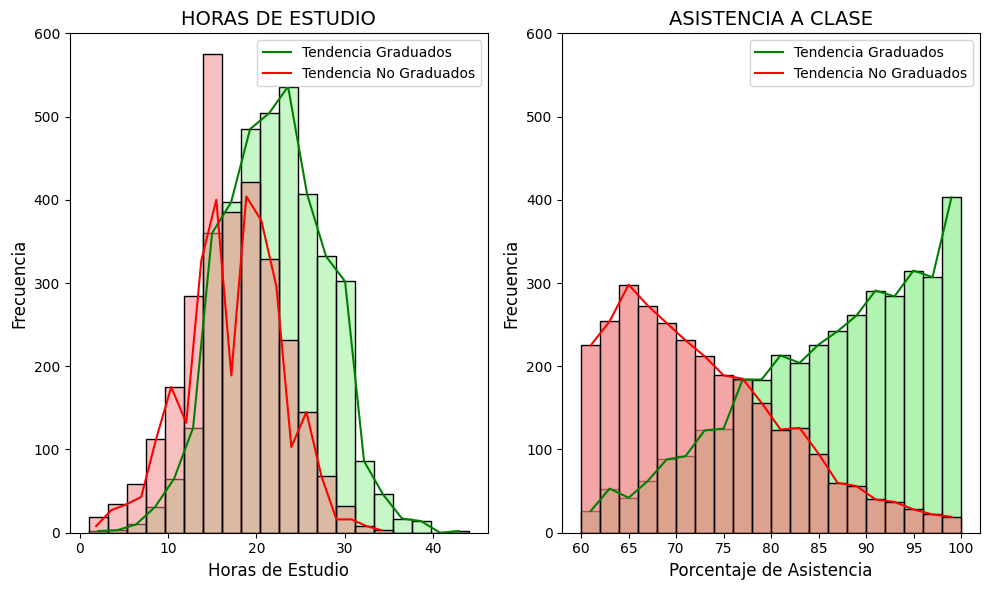

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.histplot(
    data=df_academico, x='Hours_Studied', hue='Exam_Score',
    palette={0: 'lightcoral', 1: 'lightgreen'}, kde=False, ax=ax[0], bins=20, alpha=0.5, edgecolor='black'
)


grad_hours = df_academico[df_academico['Exam_Score'] == 1]['Hours_Studied']
grad_freq, grad_bins = np.histogram(grad_hours, bins=20)
grad_centers = (grad_bins[:-1] + grad_bins[1:]) / 2
ax[0].plot(grad_centers, grad_freq, color='green', linestyle='-', label='Tendencia Graduados')


no_grad_hours = df_academico[df_academico['Exam_Score'] == 0]['Hours_Studied']
no_grad_freq, no_grad_bins = np.histogram(no_grad_hours, bins=20)
no_grad_centers = (no_grad_bins[:-1] + no_grad_bins[1:]) / 2
ax[0].plot(no_grad_centers, no_grad_freq, color='red', linestyle='-', label='Tendencia No Graduados')

ax[0].set_title('HORAS DE ESTUDIO', fontsize=14)
ax[0].set_xlabel('Horas de Estudio', fontsize=12)
ax[0].set_ylabel('Frecuencia', fontsize=12)
ax[0].set_ylim(0, 600)
ax[0].legend()

sns.histplot(
    data=df_academico, x='Attendance', hue='Exam_Score',
    palette={0: 'lightcoral', 1: 'lightgreen'}, kde=False, ax=ax[1], bins=20, alpha=0.7, edgecolor='black'
)


grad_attendance = df_academico[df_academico['Exam_Score'] == 1]['Attendance']
grad_att_freq, grad_att_bins = np.histogram(grad_attendance, bins=20)
grad_att_centers = (grad_att_bins[:-1] + grad_att_bins[1:]) / 2
ax[1].plot(grad_att_centers, grad_att_freq, color='green', linestyle='-', label='Tendencia Graduados')


no_grad_attendance = df_academico[df_academico['Exam_Score'] == 0]['Attendance']
no_grad_att_freq, no_grad_att_bins = np.histogram(no_grad_attendance, bins=20)
no_grad_att_centers = (no_grad_att_bins[:-1] + no_grad_att_bins[1:]) / 2
ax[1].plot(no_grad_att_centers, no_grad_att_freq, color='red', linestyle='-', label='Tendencia No Graduados')

ax[1].set_title('ASISTENCIA A CLASE', fontsize=14)
ax[1].set_xlabel('Porcentaje de Asistencia', fontsize=12)
ax[1].set_ylabel('Frecuencia', fontsize=12)
ax[1].set_ylim(0, 600)
ax[1].legend()


plt.tight_layout()
plt.show()